## Problem Statement:
 - Global Mart is an online supergiant store that has worldwide operations
 - We need to forecast the sales of the products for the next 6 months, so that you have a proper estimate and can plan your inventory and business processes accordingly

In [89]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Reading and understanding the data

In [90]:
retail = pd.read_csv('Global+Superstore+Data.csv')
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [91]:
retail.shape

(51290, 5)

In [92]:
retail.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [93]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [94]:
retail['Segment'].value_counts(normalize=True)

Consumer       0.517021
Corporate      0.300819
Home Office    0.182160
Name: Segment, dtype: float64

In [95]:
retail['Market'].value_counts(normalize=True)

APAC      0.214506
LATAM     0.200702
EU        0.194970
US        0.194853
EMEA      0.098050
Africa    0.089433
Canada    0.007487
Name: Market, dtype: float64

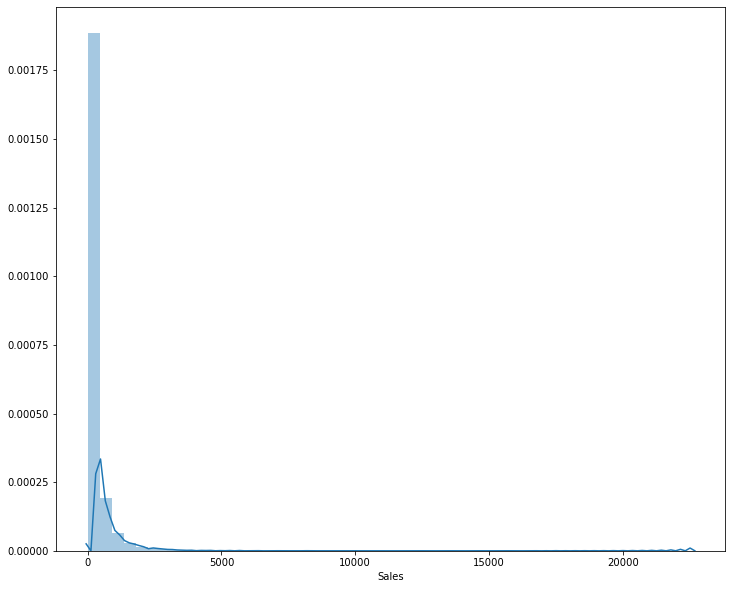

In [96]:
# Checking the distribution of numeric variables
plt.figure(figsize=(12,10))
sns.distplot(retail['Sales']);

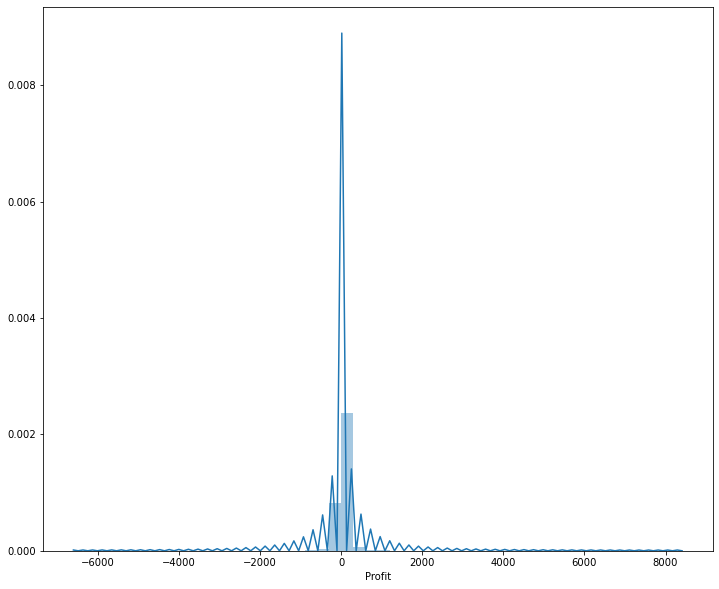

In [97]:
plt.figure(figsize=(12,10))
sns.distplot(retail['Profit']);

In [98]:
# Important Step: Converting 'Order Date' column to Datetime and assining it a correct format
retail['Order Date'] = pd.to_datetime(retail['Order Date'], format='%d-%m-%Y')

In [99]:
# Making 'Order Date' variable to 'YYYY-MM' format
retail['Order Date'] = pd.to_datetime(retail['Order Date']).dt.to_period('m')

In [100]:
retail.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-02,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-11,Consumer,Africa,2832.960,311.5200


In [101]:
# Checking type of all the variables again
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Order Date  51290 non-null  period[M]
 1   Segment     51290 non-null  object   
 2   Market      51290 non-null  object   
 3   Sales       51290 non-null  float64  
 4   Profit      51290 non-null  float64  
dtypes: float64(2), object(2), period[M](1)
memory usage: 2.0+ MB


In [102]:
# Merging 'Market' and 'Segment' variables into one i.e. 'Market-Segment'
retail['Market-Segment'] = retail['Market'] + '-' + retail['Segment']
retail.head()

,Order Date,Segment,Market,Sales,Profit,Market-Segment
0,2012-07,Consumer,US,2309.650,762.1845,US-Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,2013-11,Consumer,Africa,2832.960,311.5200,Africa-Consumer


In [103]:
# Dropping original variables 'Market' abd 'Segment' as we dont need them anymore
retail.drop(columns=['Segment','Market'],inplace=True)
retail.head()

,Order Date,Sales,Profit,Market-Segment
0,2012-07,2309.650,762.1845,US-Consumer
1,2013-02,3709.395,-288.7650,APAC-Corporate
2,2013-10,5175.171,919.9710,APAC-Consumer
3,2013-01,2892.510,-96.5400,EU-Home Office
4,2013-11,2832.960,311.5200,Africa-Consumer


In [104]:
# Pivoting the 'Profit' data at monthly level for all the 'Market-Segments' to calculate the Coefficient of variables (cov) later
retail_agg = retail.pivot_table(index='Order Date',columns='Market-Segment',values='Profit',aggfunc='sum')
retail_agg

Market-Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.70,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.3600,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.0410,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.2230,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.8580,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.1020,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088
2011-06,4328.2596,1435.8294,3452.1018,-1290.639,-259.218,-774.801,7.50,40.08,23.40,-267.030,...,-2371.776,4317.4515,2270.8170,1210.2930,1039.27972,2558.46696,643.69764,3486.7664,67.0149,1422.7431
2011-07,1258.9617,525.4647,-42.0498,621.168,134.847,-506.562,47.28,528.33,8.40,-942.603,...,-150.114,760.6920,916.9500,418.9350,1906.45620,303.29032,363.28400,-2227.2786,1308.7058,77.0902
2011-08,775.8066,4070.5581,775.7616,232.917,915.885,1090.200,43.68,29.70,NaN,285.270,...,183.276,5498.6715,1626.2670,184.6140,1946.89372,180.54028,661.66792,2157.7522,2245.4838,914.8690
2011-09,5181.4449,1952.4675,623.3595,-86.163,950.766,1345.740,134.01,10.17,NaN,1012.101,...,1151.358,5921.8785,5390.6625,2492.9010,1632.48620,386.77900,179.39744,8312.1203,-948.1010,964.0801


In [105]:
# Splitting the data into train/test i.e. train=42 and test=6
train_len = 42
train_retail_agg = retail_agg[0:train_len]
test_train_agg = retail_agg[train_len:]

In [106]:
train_retail_agg

Market-Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.70,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.3600,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.0410,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.2230,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.8580,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.1020,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088
2011-06,4328.2596,1435.8294,3452.1018,-1290.639,-259.218,-774.801,7.50,40.08,23.40,-267.030,...,-2371.776,4317.4515,2270.8170,1210.2930,1039.27972,2558.46696,643.69764,3486.7664,67.0149,1422.7431
2011-07,1258.9617,525.4647,-42.0498,621.168,134.847,-506.562,47.28,528.33,8.40,-942.603,...,-150.114,760.6920,916.9500,418.9350,1906.45620,303.29032,363.28400,-2227.2786,1308.7058,77.0902
2011-08,775.8066,4070.5581,775.7616,232.917,915.885,1090.200,43.68,29.70,NaN,285.270,...,183.276,5498.6715,1626.2670,184.6140,1946.89372,180.54028,661.66792,2157.7522,2245.4838,914.8690
2011-09,5181.4449,1952.4675,623.3595,-86.163,950.766,1345.740,134.01,10.17,NaN,1012.101,...,1151.358,5921.8785,5390.6625,2492.9010,1632.48620,386.77900,179.39744,8312.1203,-948.1010,964.0801


In [107]:
# Creating new pandas datafrome to store the values of 'Market-Segment' and 'COV'
cov = pd.DataFrame(columns = ['MarketSegment','COV'])

In [108]:
# Calculating the COVs 
for i in train_retail_agg.columns:
    temp = {'MarketSegment': i, 'COV': np.std(train_retail_agg[i]/np.mean(train_retail_agg[i]))}
    cov = cov.append(temp,ignore_index=True)

In [109]:
# Sorting COVs in ascending order
cov.sort_values(by='COV')

,MarketSegment,COV
0,APAC-Consumer,0.596404
12,EU-Consumer,0.647485
15,LATAM-Consumer,0.680684
13,EU-Corporate,0.689346
1,APAC-Corporate,0.731926
16,LATAM-Corporate,0.880260
19,US-Corporate,1.027209
2,APAC-Home Office,1.048817
18,US-Consumer,1.095295
14,EU-Home Office,1.114681


##### Observation: As we can see from the above 'COV' table, 'APAC-Consumer' market segment has the lowest variations in the data when it comes to 'Profit' and hence we will do our further analysis and model on this market-segment only.

In [110]:
# Filtering the data for only 'APAC-Consumer' market segment
retail_new = retail[retail['Market-Segment']=='APAC-Consumer']
retail_new.head()

,Order Date,Sales,Profit,Market-Segment
2,2013-10,5175.171,919.971,APAC-Consumer
6,2011-11,1822.080,564.840,APAC-Consumer
7,2012-04,5244.840,996.480,APAC-Consumer
14,2013-06,3701.520,1036.080,APAC-Consumer
29,2012-02,1878.720,582.360,APAC-Consumer


In [111]:
retail_new.shape

(5699, 4)

In [112]:
# Dropping 'Profit' and 'Market-Segment' variables from the data as we don't need them in further analysis and modelling
retail_new.drop(columns=['Profit','Market-Segment'],inplace=True)

In [113]:
# Grouping the data at month level and index as 'Order Date'.
retail_final = retail_new.groupby(['Order Date']).sum()
retail_final

,Sales
Order Date,
2011-01,15711.7125
2011-02,12910.8588
2011-03,19472.5632
2011-04,15440.3046
2011-05,24348.9723
2011-06,27260.0196
2011-07,15842.8317
2011-08,22012.2366
2011-09,34613.1849


In [114]:
# Converting the 'retail_final' dataframe to timestamp for further Time Series Analysis
retail_final = retail_final.to_timestamp()

In [115]:
retail_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2011-01-01 to 2014-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   48 non-null     float64
dtypes: float64(1)
memory usage: 768.0 bytes


In [116]:
# Splitting the 'retail_final' data into train and test
train_retail = retail_final[0:train_len]
test_retail = retail_final[train_len:]

In [117]:
train_retail.shape

(42, 1)

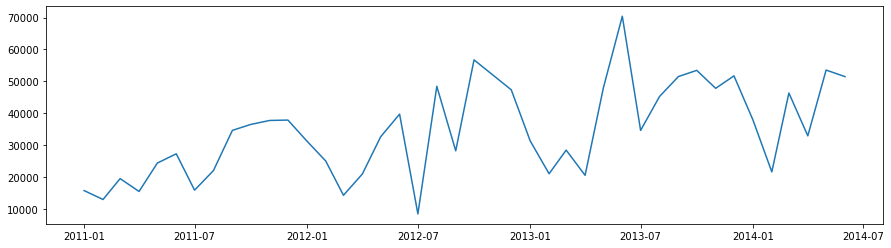

In [118]:
# Plotting the line chart to visualize the data
plt.figure(figsize=(15,4))
plt.plot(train_retail);

### Time series Decomposition

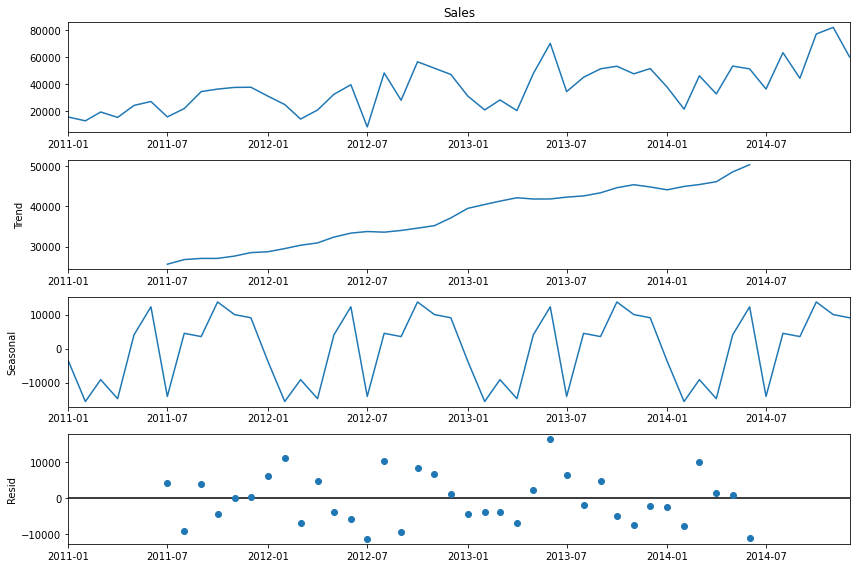

In [119]:
# Additive seasonal index

from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(retail_final.Sales, model='additive') 
fig = decomposition.plot()
plt.show()

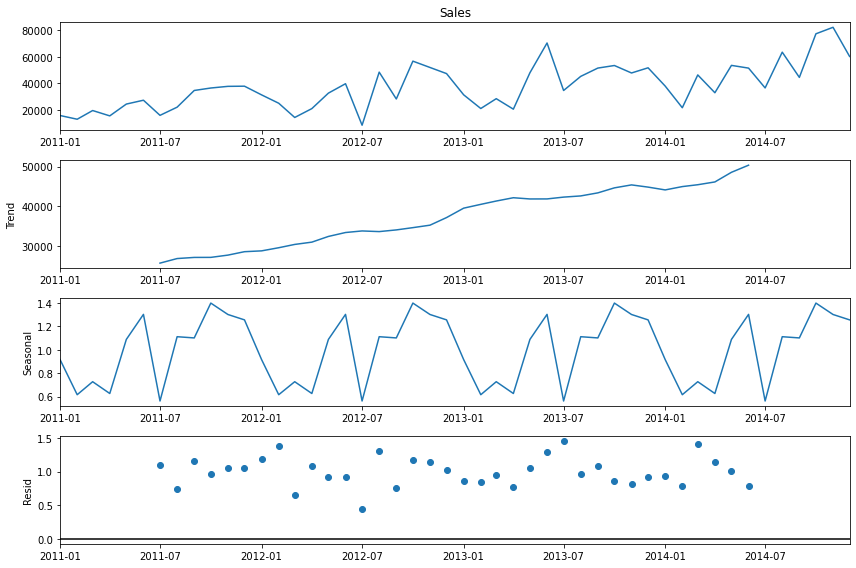

In [120]:
# Multiplicative seasonal index

decomposition = sm.tsa.seasonal_decompose(retail_final.Sales, model='multiplicative') 
fig = decomposition.plot()
plt.show()

## Model Building and Time Series Forecasting using various methods

### Important Note: Based on the flowchart we'd shown in the module, if data has more than 10 observations then we should not be using 'Naive method' and 'Simple Moving Average' method. But still I've run these models for the sake of checking their MAPE values and will compare it with rest of the methods/models. Based on the flow chart, we should use 'Exponential Smoothing' and 'Auto Regressive' methods to forecast the time series data of this retail  store dataset. During the presentation, I will ignore the results we got from Naive and Simple Moving Average methods.

### 1. Naive Method:

In [121]:
y_hat_naive = test_retail.copy()
y_hat_naive['naive_forecast'] = train_retail['Sales'][train_len-1]

In [122]:
# Creating a function to plot train, test and forecasting data on chart
def plot_train_test_forcast(data,col,method):
    plt.figure(figsize=(15,4))
    plt.plot(train_retail['Sales'], label='Train')
    plt.plot(test_retail['Sales'], label='Test')
    plt.plot(data[col], label=col)
    plt.legend(loc='best')
    plt.title(method)
    return plt.show()

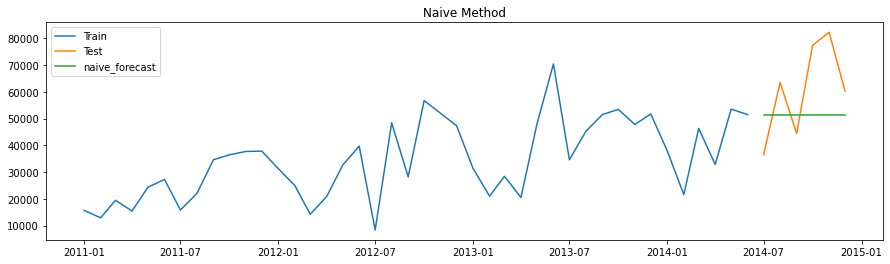

In [123]:
plot_train_test_forcast(data=y_hat_naive,col='naive_forecast',method='Naive Method')

In [124]:
from sklearn.metrics import mean_squared_error


In [125]:
results = pd.DataFrame(columns=['Method','MAPE'])
results

,Method,MAPE


In [126]:
# Creating a function for calculating MAPE values and to reuse the similar code again for different forecasting methods

def calc_mape(data,col,method):
    global results
    mape = np.round(np.mean(np.abs(test_retail['Sales']-data[col])/test_retail['Sales'])*100,2)
    tempResults = pd.DataFrame({'Method':[method], 'MAPE': [mape]})
    results = pd.concat([results, tempResults])
    results = results[['Method', 'MAPE']]
    return results

In [127]:

calc_mape(data=y_hat_naive,col='naive_forecast',method='Naive Method')

,Method,MAPE
0,Naive Method,26.86


### 2. Simple Average Method

In [128]:
y_hat_avg = test_retail.copy()
y_hat_avg['avg_forecast'] = train_retail['Sales'].mean()

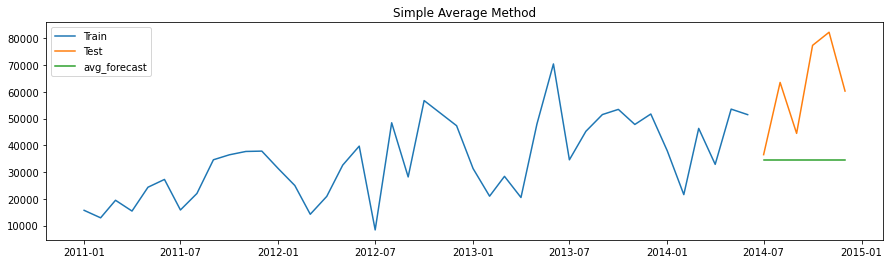

In [129]:
plot_train_test_forcast(data=y_hat_avg,col='avg_forecast',method='Simple Average Method')

In [130]:
calc_mape(data=y_hat_avg,col='avg_forecast',method='Simple Average Method')

,Method,MAPE
0,Naive Method,26.86
0,Simple Average Method,38.18


### 3. Simple Moving Average Method:

In [131]:
y_hat_sma = retail_final.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = retail_final['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

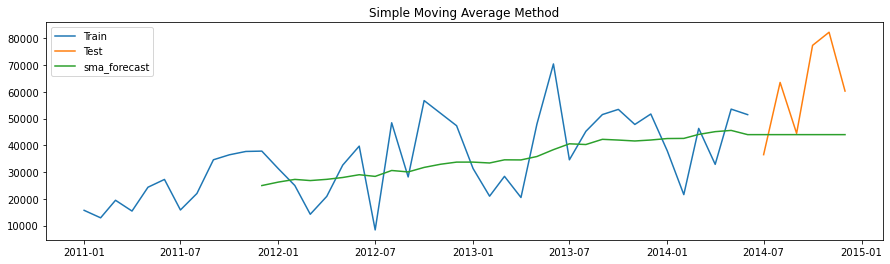

In [132]:
plot_train_test_forcast(data=y_hat_sma,col='sma_forecast',method='Simple Moving Average Method')

In [133]:
calc_mape(data=y_hat_sma,col='sma_forecast',method='Simple Moving Average Method')

,Method,MAPE
0,Naive Method,26.86
0,Simple Average Method,38.18
0,Simple Moving Average Method,28.15


### 4. Simple Exponential Smoothing Method

In [134]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_retail['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test_retail.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)


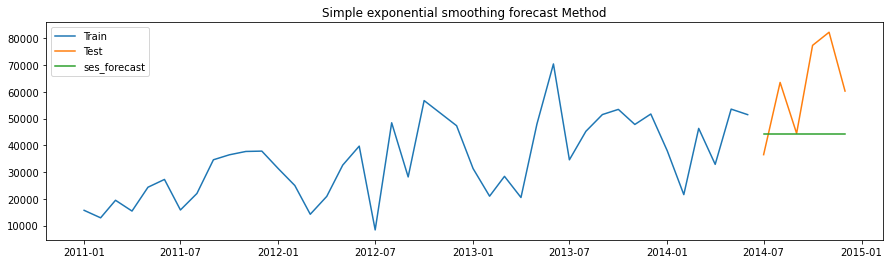

In [135]:
plot_train_test_forcast(data=y_hat_ses,col='ses_forecast',method='Simple exponential smoothing forecast Method')

In [136]:
calc_mape(data=y_hat_ses,col='ses_forecast',method='Simple exponential smoothing Method')

,Method,MAPE
0,Naive Method,26.86
0,Simple Average Method,38.18
0,Simple Moving Average Method,28.15
0,Simple exponential smoothing Method,27.82


### 5. Holts Method

In [137]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_retail['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test_retail.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test_retail))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 15711.712500000003, 'initial_slope': -2800.8537000000033, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


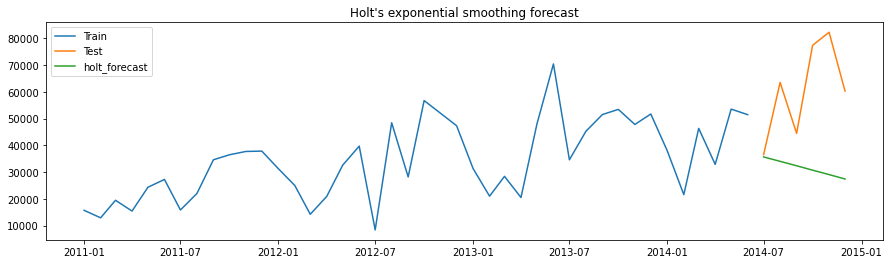

In [138]:
plot_train_test_forcast(data=y_hat_holt,col='holt_forecast',method='Holt\'s exponential smoothing forecast')

In [139]:
calc_mape(data=y_hat_holt,col='holt_forecast',method='Holt\'s exponential smoothing Method')

,Method,MAPE
0,Naive Method,26.86
0,Simple Average Method,38.18
0,Simple Moving Average Method,28.15
0,Simple exponential smoothing Method,27.82
0,Holt's exponential smoothing Method,42.57


### 6. Holt Winters' additive method

In [140]:
y_hat_hwa = test_retail.copy()
model = ExponentialSmoothing(np.asarray(train_retail['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.052631578947367676, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.10526315789474942, 'damping_slope': nan, 'initial_level': 29061.291899999596, 'initial_slope': 730.4167145833245, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


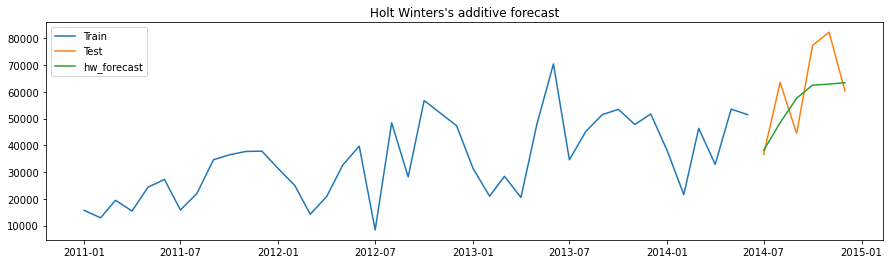

In [141]:
plot_train_test_forcast(data=y_hat_hwa,col='hw_forecast',method='Holt Winters\'s additive forecast')

In [142]:
calc_mape(data=y_hat_hwa,col='hw_forecast',method='Holt Winters\'s additive Method')

,Method,MAPE
0,Naive Method,26.86
0,Simple Average Method,38.18
0,Simple Moving Average Method,28.15
0,Simple exponential smoothing Method,27.82
0,Holt's exponential smoothing Method,42.57
0,Holt Winters's additive Method,17.61


### 7. Holt Winter's multiplicative method

In [143]:
y_hat_hwm = test_retail.copy()
model = ExponentialSmoothing(np.asarray(train_retail['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.21052631578947367, 'damping_slope': nan, 'initial_level': 29061.291900000004, 'initial_slope': 730.4167145833347, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


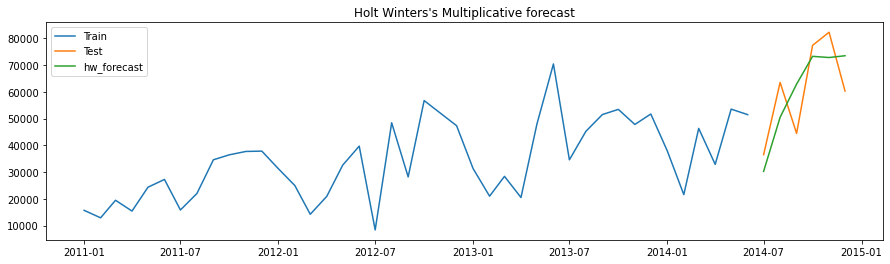

In [144]:
plot_train_test_forcast(data=y_hat_hwm,col='hw_forecast',method='Holt Winters\'s Multiplicative forecast')

In [145]:
calc_mape(data=y_hat_hwm,col='hw_forecast',method='Holt Winters\'s Multiplicative Method')

,Method,MAPE
0,Naive Method,26.86
0,Simple Average Method,38.18
0,Simple Moving Average Method,28.15
0,Simple exponential smoothing Method,27.82
0,Holt's exponential smoothing Method,42.57
0,Holt Winters's additive Method,17.61
0,Holt Winters's Multiplicative Method,19.62


# Auto Regressive Methods

### Checking the stationarity of the data

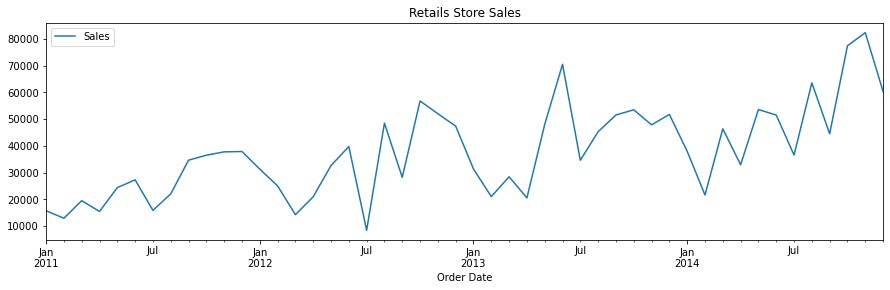

In [146]:
retail_final['Sales'].plot(figsize=(15, 4))
plt.legend(loc='best')
plt.title('Retails Store Sales')
plt.show(block=False)

### Augmented Dickey-Fuller (ADF) test

In [147]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(retail_final['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.220857
Critical Values @ 0.05: -2.93
p-value: 0.198763


### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test¶

In [148]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(retail_final['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.595515
Critical Values @ 0.05: 0.46
p-value: 0.023044


##### Observation: We can conclude that, data is not stationary yet and we need to do box cox transformation in order to make the data stationary for further modelling based on Auto Regressive mothods 

### Box Cox transformation to make variance constant

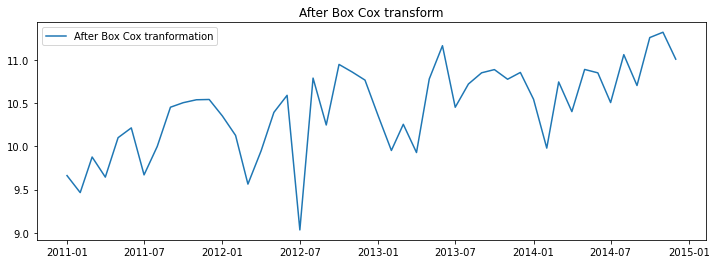

In [149]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(retail_final['Sales'], lmbda=0), index = retail_final.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

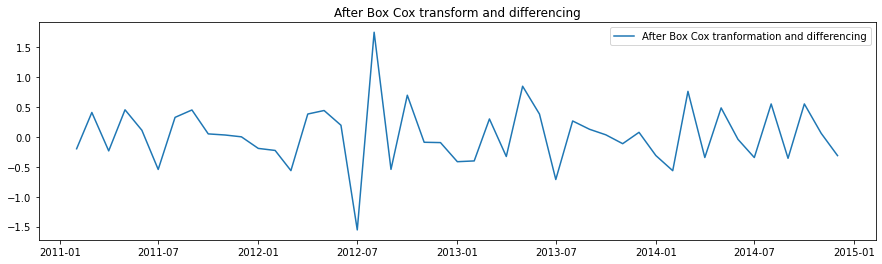

In [150]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), retail_final.index)
plt.figure(figsize=(15,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [151]:
data_boxcox_diff.dropna(inplace=True)

In [152]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.553405
2014-09-01   -0.356405
2014-10-01    0.553748
2014-11-01    0.061479
2014-12-01   -0.311004
Freq: MS, dtype: float64

In [153]:
# Lets again perform the ADF and KPSS test to check the stationarity of the data
# Augmented Dickey-Fuller (ADF) test

adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


In [154]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])


KPSS Statistic: 0.135659
Critical Values @ 0.05: 0.46
p-value: 0.100000


##### Observation: We can now conclude that, data is now stationary as p-value in ADF test is below 0.05 and we can reject the original null hypthesis of 'Data is not stationary'. And vice-versa for the KPSS test as well.

#### Important: We won't be plotting ACF and PACF values as mentioned in the assignment and instead will use directly provided values of p=1, d=1, q=1.

In [155]:
# Splitting both the boxcox datas into train and test
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [156]:
train_data_boxcox_diff

Order Date
2011-02-01   -0.196338
2011-03-01    0.410938
2011-04-01   -0.232025
2011-05-01    0.455508
2011-06-01    0.112932
2011-07-01   -0.542704
2011-08-01    0.328881
2011-09-01    0.452636
2011-10-01    0.052311
2011-11-01    0.033713
2011-12-01    0.003292
2012-01-01   -0.190545
2012-02-01   -0.224703
2012-03-01   -0.562166
2012-04-01    0.384877
2012-05-01    0.443562
2012-06-01    0.197027
2012-07-01   -1.554595
2012-08-01    1.753416
2012-09-01   -0.541343
2012-10-01    0.699452
2012-11-01   -0.087925
2012-12-01   -0.093177
2013-01-01   -0.412912
2013-02-01   -0.400011
2013-03-01    0.302394
2013-04-01   -0.326054
2013-05-01    0.849926
2013-06-01    0.383940
2013-07-01   -0.710954
2013-08-01    0.268477
2013-09-01    0.129600
2013-10-01    0.036881
2013-11-01   -0.111427
2013-12-01    0.078506
2014-01-01   -0.310206
2014-02-01   -0.563617
2014-03-01    0.764032
2014-04-01   -0.342611
2014-05-01    0.487122
2014-06-01   -0.039254
Freq: MS, dtype: float64

### 8. Auto regression method (AR)

In [157]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


### Recover original time series

In [158]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

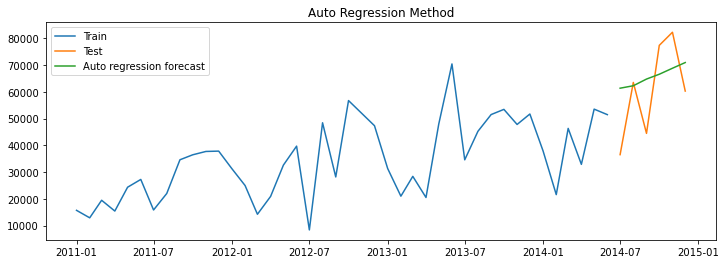

In [159]:
# plot_train_test_forcast(data=y_hat_ar,col='ar_forecast',method='Auto regression forecast')
plt.figure(figsize=(12,4))
plt.plot(train_retail['Sales'], label='Train')
plt.plot(test_retail['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test_retail.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [160]:
calc_mape(data=y_hat_ar,col='ar_forecast',method='(AR) Auto regression Method')

,Method,MAPE
0,Naive Method,26.86
0,Simple Average Method,38.18
0,Simple Moving Average Method,28.15
0,Simple exponential smoothing Method,27.82
0,Holt's exponential smoothing Method,42.57
0,Holt Winters's additive Method,17.61
0,Holt Winters's Multiplicative Method,19.62
0,(AR) Auto regression Method,27.27


### 9. Moving average method (MA)

In [161]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.022694
ma.L1.y   -1.000000
dtype: float64


### Recover original time series

In [162]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

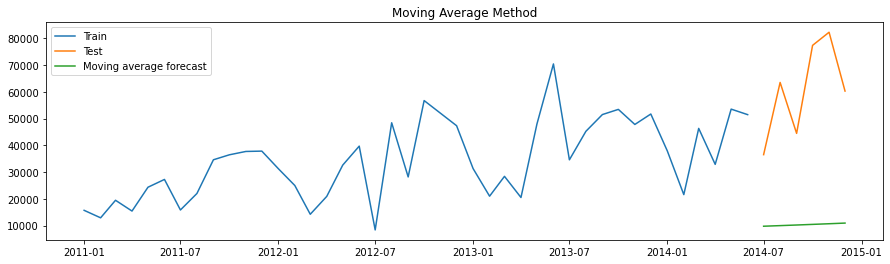

In [163]:
plt.figure(figsize=(15,4))
plt.plot(retail_final['Sales'][:train_len], label='Train')
plt.plot(retail_final['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test_retail.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [164]:
calc_mape(data=y_hat_ma,col='ma_forecast',method='(MA) Moving Average Method')

,Method,MAPE
0,Naive Method,26.86
0,Simple Average Method,38.18
0,Simple Moving Average Method,28.15
0,Simple exponential smoothing Method,27.82
0,Holt's exponential smoothing Method,42.57
0,Holt Winters's additive Method,17.61
0,Holt Winters's Multiplicative Method,19.62
0,(AR) Auto regression Method,27.27
0,(MA) Moving Average Method,81.64


### 10. Auto regression moving average method (ARMA)

In [165]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.022810
ar.L1.y    0.115922
ma.L1.y   -0.999957
dtype: float64


### Recover original time series

In [166]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

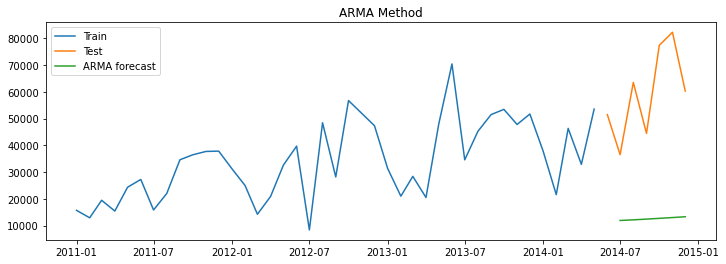

In [167]:
plt.figure(figsize=(12,4))
plt.plot(retail_final['Sales'][:train_len-1], label='Train')
plt.plot(retail_final['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test_retail.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [168]:
calc_mape(data=y_hat_arma,col='arma_forecast',method='(ARMA) Autoregressive Moving Average Method')

,Method,MAPE
0,Naive Method,26.86
0,Simple Average Method,38.18
0,Simple Moving Average Method,28.15
0,Simple exponential smoothing Method,27.82
0,Holt's exponential smoothing Method,42.57
0,Holt Winters's additive Method,17.61
0,Holt Winters's Multiplicative Method,19.62
0,(AR) Auto regression Method,27.27
0,(MA) Moving Average Method,81.64
0,(ARMA) Autoregressive Moving Average Method,77.66


### 11. Auto regressive integrated moving average (ARIMA)

In [169]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.022810
ar.L1.D.y    0.115922
ma.L1.D.y   -0.999957
dtype: float64


### Recover original time series forecast

In [170]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

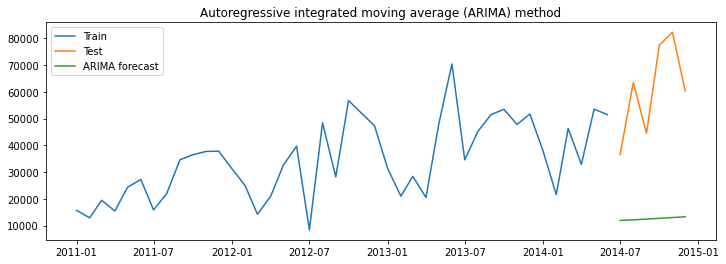

In [171]:
plt.figure(figsize=(12,4))
plt.plot(train_retail['Sales'], label='Train')
plt.plot(test_retail['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_retail.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [172]:
calc_mape(data=y_hat_arima,col='arima_forecast',method='(ARIMA) Autoregressive Integrated Moving Average Method')

,Method,MAPE
0,Naive Method,26.86
0,Simple Average Method,38.18
0,Simple Moving Average Method,28.15
0,Simple exponential smoothing Method,27.82
0,Holt's exponential smoothing Method,42.57
0,Holt Winters's additive Method,17.61
0,Holt Winters's Multiplicative Method,19.62
0,(AR) Auto regression Method,27.27
0,(MA) Moving Average Method,81.64
0,(ARMA) Autoregressive Moving Average Method,77.66


### 12. Seasonal auto regressive integrated moving average (SARIMA)

In [173]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.100536
ma.L1      -0.994255
ar.S.L12   -0.395027
ma.S.L12   -0.985929
sigma2      0.047403
dtype: float64


### Recover original time series forecast

In [174]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

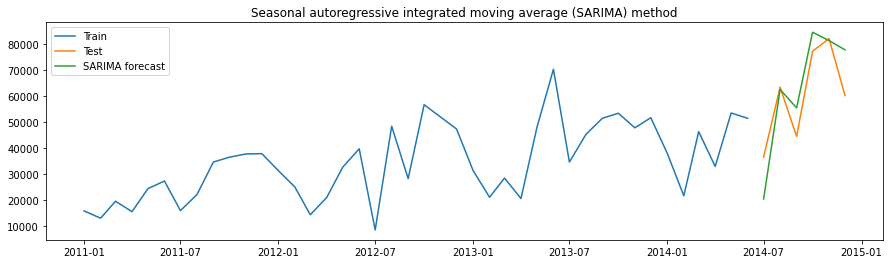

In [175]:
plt.figure(figsize=(15,4))
plt.plot(train_retail['Sales'], label='Train')
plt.plot(test_retail['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_retail.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [176]:
calc_mape(data=y_hat_sarima,col='sarima_forecast',method='(SARIMA) Seasonal Autoregressive Integrated Moving Average Method')

,Method,MAPE
0,Naive Method,26.86
0,Simple Average Method,38.18
0,Simple Moving Average Method,28.15
0,Simple exponential smoothing Method,27.82
0,Holt's exponential smoothing Method,42.57
0,Holt Winters's additive Method,17.61
0,Holt Winters's Multiplicative Method,19.62
0,(AR) Auto regression Method,27.27
0,(MA) Moving Average Method,81.64
0,(ARMA) Autoregressive Moving Average Method,77.66


### Comment:
 - We are done with performing all the time series forecasting methods/models on the Retail store data
 - If we just look at the smoothing techniques, then `Holt Winters's additive forecast` performs better with MAPE value of 17.61
 - And if we look at the Auto Regressive methods, then `(SARIMA) Seasonal Autoregressive Integrated` method performs better with a MAPE value of 18.38
 - So at an overall, looking at the above table of MAPE values for all the forecasting methods, we can clearly see that `Holt Winters's additive forecast` is clear winner with MAPE value of 17.61
 - So we can conclude that, `Holt Winters's additive forecast` is more accurate amongst all other forecasting methods on this retail store data